In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
pd.set_option('display.max_columns',None)

In [2]:
#read in data
WAR=pd.read_csv('WAR.csv')
Offense=pd.read_csv('BoxScoreStats.csv')
stats23=pd.merge(WAR,Offense,on=['Name','Tm'],how='inner')
stats23=stats23.dropna()
stats23

,Name,Tm,WAR,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GDP,HBP,SH,SF,IBB
0,CJ Abrams*,WSN,3.4,151,614,563,83,138,28,6,18,64,47,4,32,118,7,13,3,3,2
1,José Abreu,HOU,0.0,141,594,540,62,128,23,1,18,90,0,1,42,130,16,6,0,6,1
2,Wilyer Abreu*,BOS,0.8,28,85,76,10,24,6,0,2,14,3,1,9,23,0,0,0,0,0
3,Ronald Acuna Jr.,ATL,8.2,159,735,643,149,217,35,4,41,106,73,14,80,84,15,9,0,3,3
4,Willy Adames,MIL,3.0,149,638,553,73,120,29,2,24,80,5,3,71,165,12,6,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Masataka Yoshida*,BOS,1.4,140,580,537,71,155,33,3,15,72,8,0,34,81,20,7,0,2,0
707,Alex Young*,CIN,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
708,Jacob Young,WSN,0.6,33,121,107,9,27,7,1,0,12,13,0,10,22,2,1,3,0,0
709,Jared Young*,CHC,-0.1,16,47,43,8,8,0,3,2,8,2,0,3,13,1,1,0,0,0


In [3]:
#create correlation matrix
WAR_corr=stats23.corr(numeric_only=True)
WAR_corr.style.background_gradient(cmap='coolwarm')

,WAR,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GDP,HBP,SH,SF,IBB
WAR,1.000000,0.673185,0.735816,0.725632,0.825395,0.778456,0.763293,0.553470,0.773114,0.776322,0.551175,0.484445,0.737418,0.633831,0.535679,0.517742,0.065370,0.561454,0.506798
G,0.673185,1.000000,0.980173,0.980300,0.933677,0.955734,0.923353,0.579937,0.812120,0.913129,0.542213,0.554461,0.862377,0.918995,0.802254,0.652217,0.240526,0.733601,0.421342
PA,0.735816,0.980173,1.000000,0.998677,0.968958,0.986016,0.950353,0.594614,0.859107,0.949111,0.548694,0.556968,0.896473,0.922753,0.824977,0.663624,0.167103,0.756529,0.472040
AB,0.725632,0.980300,0.998677,1.000000,0.963348,0.987995,0.952384,0.597679,0.850866,0.945689,0.551186,0.560060,0.873795,0.919942,0.830245,0.655968,0.165196,0.753481,0.458484
R,0.825395,0.933677,0.968958,0.963348,1.000000,0.968137,0.934893,0.611811,0.894570,0.948399,0.591523,0.567578,0.905579,0.888812,0.766529,0.652742,0.138319,0.736733,0.509484
H,0.778456,0.955734,0.986016,0.987995,0.968137,1.000000,0.962623,0.604776,0.847572,0.946093,0.566074,0.565430,0.858342,0.879657,0.825781,0.643908,0.132191,0.753065,0.492947
2B,0.763293,0.923353,0.950353,0.952384,0.934893,0.962623,1.000000,0.567688,0.810953,0.915635,0.527654,0.517206,0.826780,0.862740,0.784475,0.617832,0.111744,0.726907,0.477862
3B,0.553470,0.579937,0.594614,0.597679,0.611811,0.604776,0.567688,1.000000,0.452899,0.519077,0.592494,0.572293,0.496299,0.531841,0.382846,0.365072,0.225435,0.457013,0.297088
HR,0.773114,0.812120,0.859107,0.850866,0.894570,0.847572,0.810953,0.452899,1.000000,0.939896,0.400600,0.402649,0.840079,0.855750,0.685454,0.566059,-0.008797,0.653828,0.544907
RBI,0.776322,0.913129,0.949111,0.945689,0.948399,0.946093,0.915635,0.519077,0.939896,1.000000,0.474767,0.475738,0.871558,0.891378,0.785183,0.624942,0.059994,0.763197,0.524757


<IPython.core.display.Javascript object>


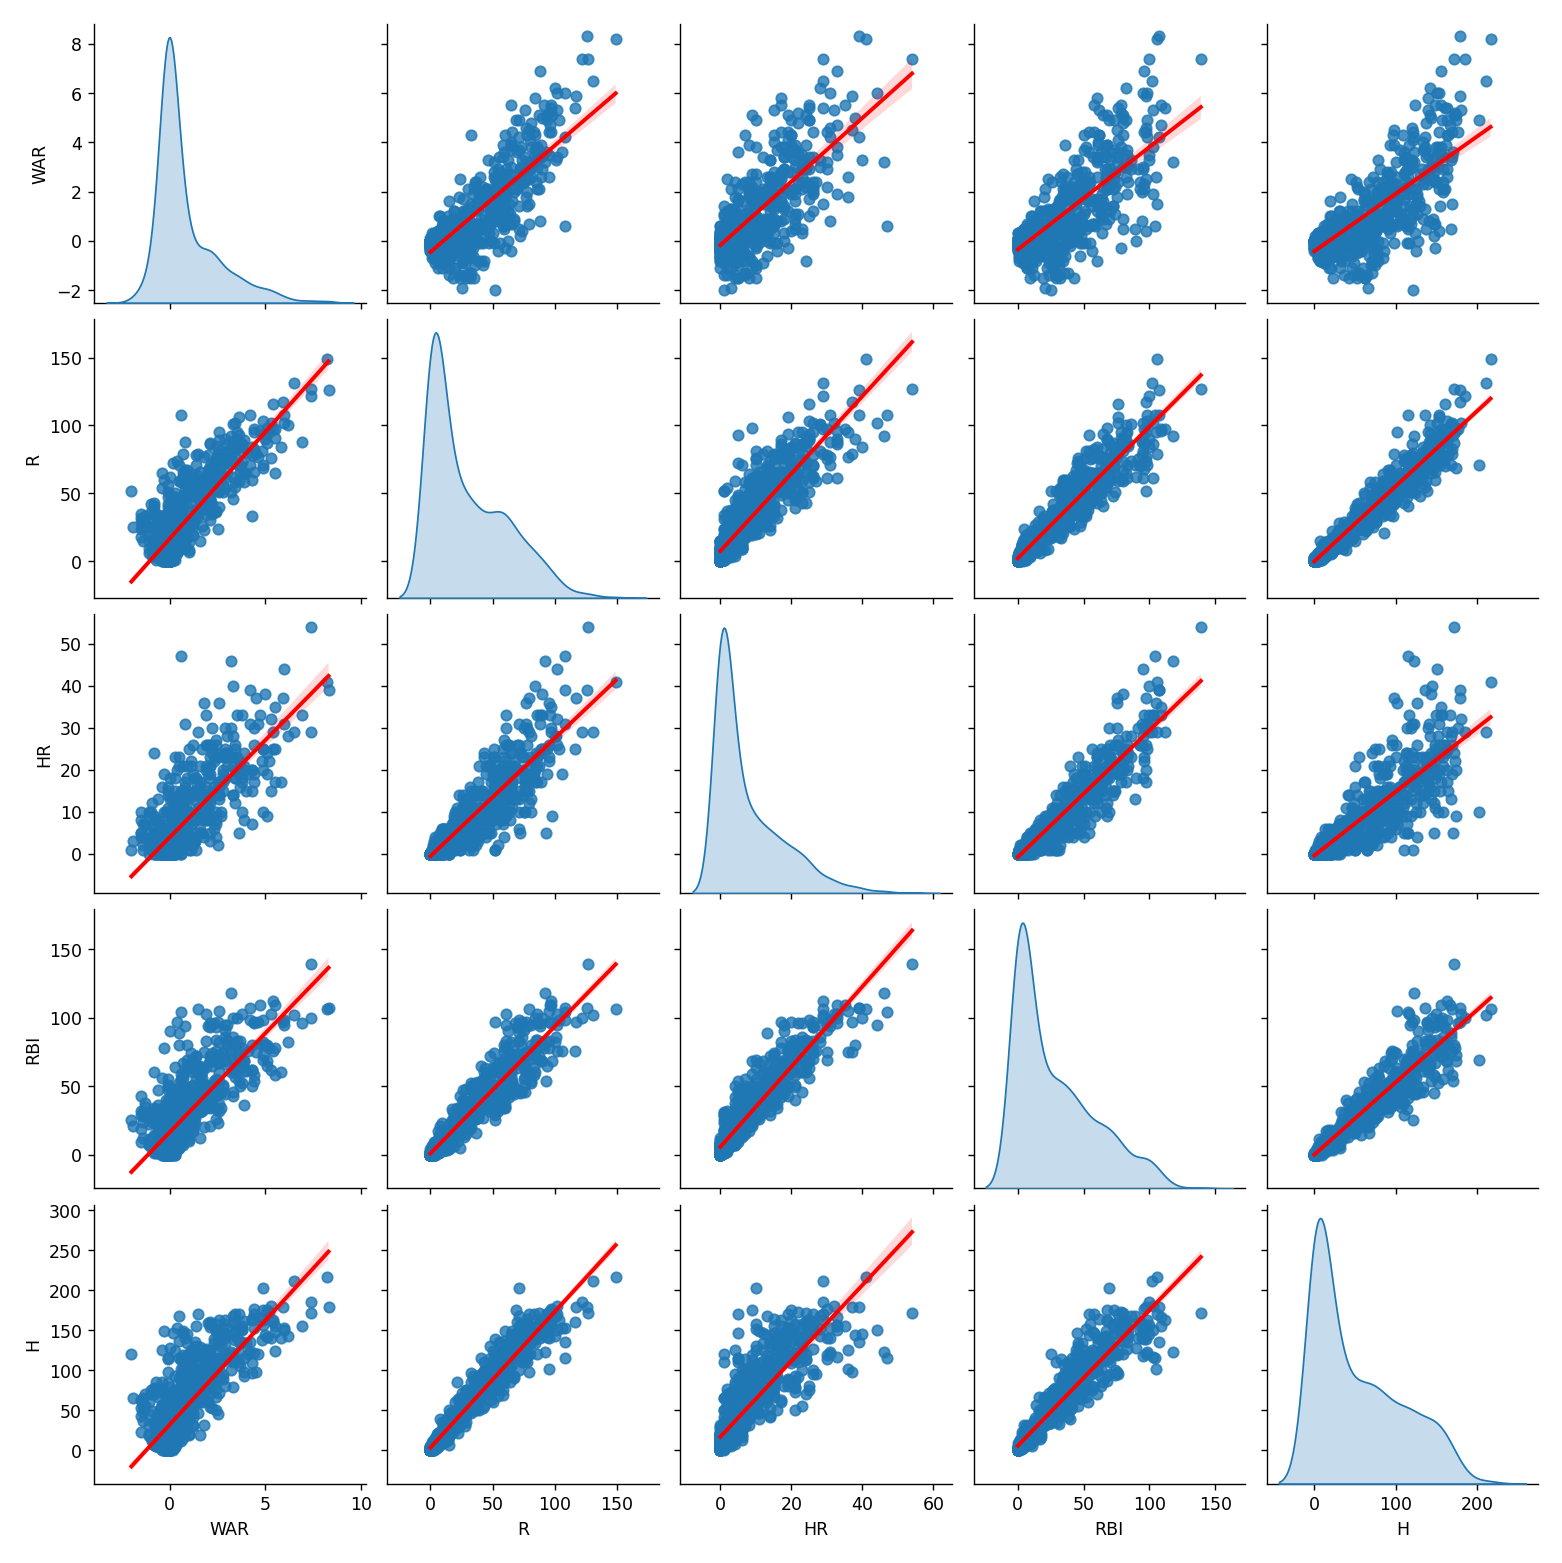

C:\Users\esais\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [4]:
#visualizing
WAR_plot_matrix=sns.pairplot(stats23[['WAR','R','HR','RBI','H']],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

<IPython.core.display.Javascript object>


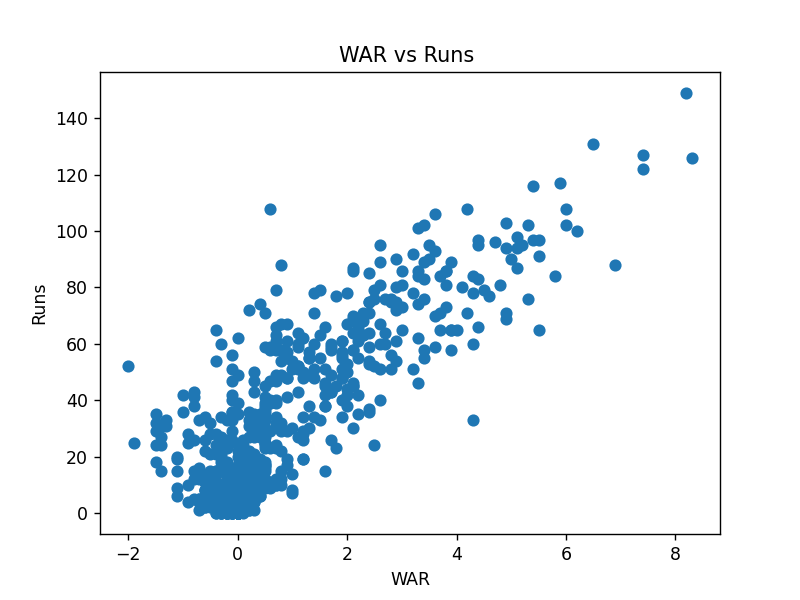

Text(0.5, 1.0, 'WAR vs Runs ')

Text(0.5, 0, 'WAR')

Text(0, 0.5, 'Runs')

In [5]:
# will focus on Runs,as this has highest correlation
fig=plt.figure()
plt.scatter(stats23['WAR'],stats23['R'])
plt.title('WAR vs Runs ')
plt.xlabel('WAR')
plt.ylabel("Runs")

In [6]:
# now fitting to regression model
data=stats23[['WAR','R']]
X=data.iloc[:,:1]
y=data.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

<IPython.core.display.Javascript object>


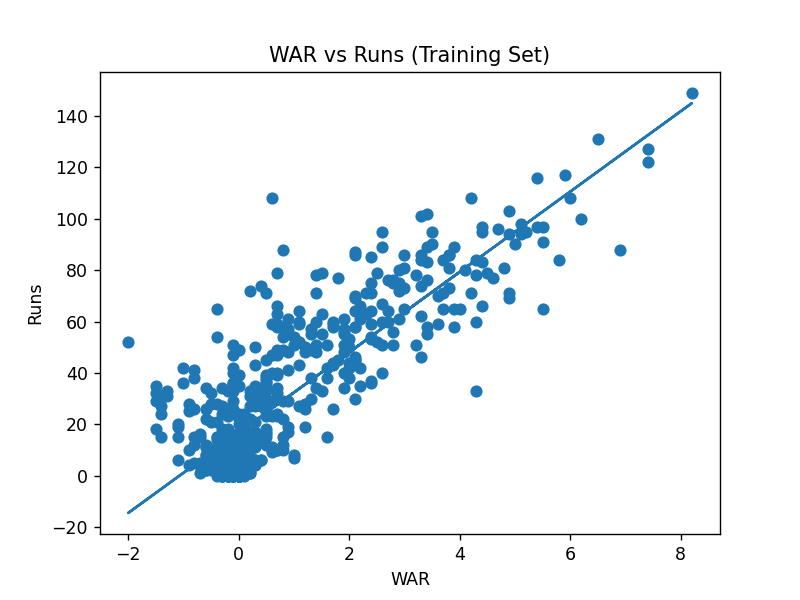

Text(0.5, 1.0, 'WAR vs Runs (Training Set)')

Text(0.5, 0, 'WAR')

Text(0, 0.5, 'Runs')

In [8]:
fig2=plt.figure()
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train)
plt.title('WAR vs Runs (Training Set)')
plt.xlabel('WAR')
plt.ylabel("Runs")

<IPython.core.display.Javascript object>


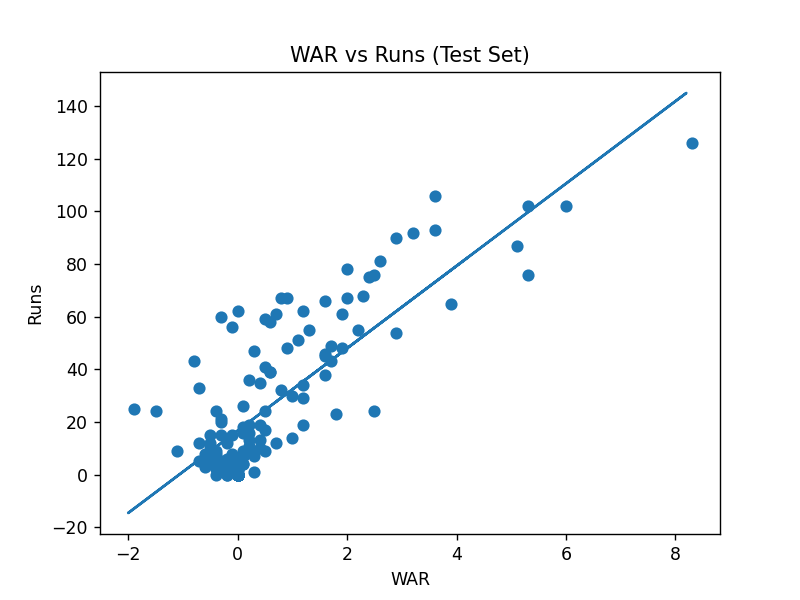

Text(0.5, 1.0, 'WAR vs Runs (Test Set)')

Text(0.5, 0, 'WAR')

Text(0, 0.5, 'Runs')

In [9]:
fig3=plt.figure()
plt.scatter(X_test, y_test,)
plt.plot(X_train, y_pred_train)
plt.title('WAR vs Runs (Test Set)')
plt.xlabel('WAR')
plt.ylabel("Runs")

In [10]:
# calculate R2
r2=r2_score(y_test,regressor.predict(X_test))
r2

0.6449105944811624

In [11]:
# now comparing to R2 of the other stats, and Runs prodcues the highest value
stats=['HR','RBI','H','BB']
for stat in stats:
    data=stats23[['WAR',stat]]
    X=data.iloc[:,:1]
    y=data.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred_test = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    r2=r2_score(y_test,regressor.predict(X_test))
    print(stat+' '+r2.astype(str))

LinearRegression()

HR 0.5230771960510682


LinearRegression()

RBI 0.49655406759082865


LinearRegression()

H 0.5242015734905267


LinearRegression()

BB 0.5535768492286415
